DBSCAN

Read Data 

In [1]:
import numpy as np
import pandas as pd

In [2]:
# reading csv file created and exception handling
try:
    df = pd.read_csv('cluster_data.csv')
    # print dataset
    print("========================== Dataset ========================== ")
    print(df)
except FileNotFoundError as e:
    print("Error: Cannot find the File(CSV), Check the Path again")
    exit(1)

========================== Dataset ========================== 
         AppID  Supported_languages_' Korean'   
0        20200                              0  \
1       655370                              0   
2      1732930                              0   
3      1355720                              0   
4      1139950                              0   
...        ...                            ...   
76982  1619420                              0   
76983  2224030                              0   
76984  2503930                              0   
76985  2524860                              0   
76986  2431960                              0   

       Supported_languages_'Afrikaans'  Supported_languages_'Albanian'   
0                                    0                               0  \
1                                    0                               0   
2                                    0                               0   
3                                    0              

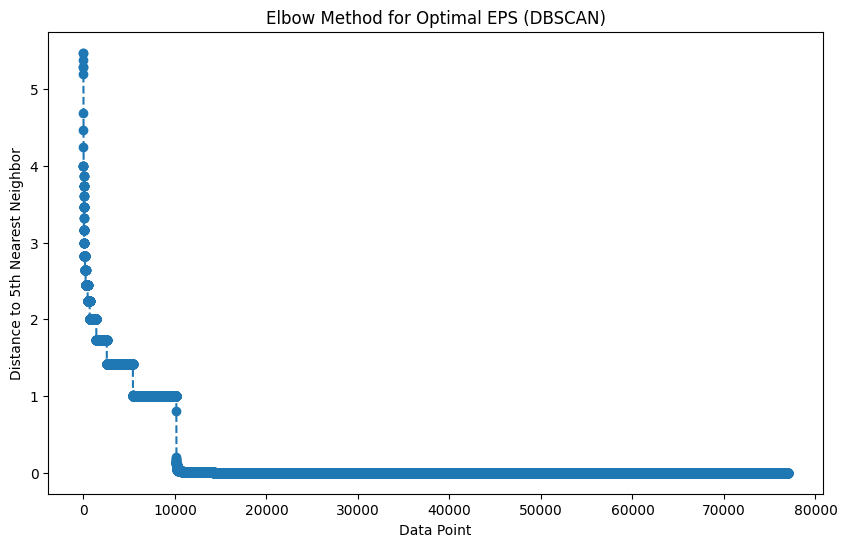

In [3]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the loaded data

# Extracting features for DBSCAN
features = df.drop('AppID', axis=1)

# Calculating distances to k-nearest neighbors
neighbors = NearestNeighbors(n_neighbors=5)  # You can adjust the value of 'n_neighbors'
neighbors_fit = neighbors.fit(features)
distances, indices = neighbors_fit.kneighbors(features)

# Sorting distances
sorted_distances = sorted(distances[:, 4], reverse=True)

# Plotting the distances
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_distances) + 1), sorted_distances, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal EPS (DBSCAN)')
plt.xlabel('Data Point')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.show()


In [4]:
from sklearn.cluster import DBSCAN

# Assuming x=1000 as the chosen elbow point
eps = sorted_distances[10000]
print(eps)

# Using DBSCAN with the determined eps value
dbscan = DBSCAN(eps=eps, min_samples=5)  # You can adjust the value of 'min_samples'
clusters = dbscan.fit_predict(features)

# Add the cluster labels to your DataFrame
df['Cluster_Labels'] = clusters

# Print the number of clusters and samples in each cluster
print("Number of clusters:", len(set(clusters)))
print("Number of samples in each cluster:")
print(df['Cluster_Labels'].value_counts())


1.0
Number of clusters: 128
Number of samples in each cluster:
Cluster_Labels
 0      66936
-1       7367
 5        685
 8        354
 111      163
        ...  
 104        5
 118        4
 86         4
 105        4
 97         3
Name: count, Length: 128, dtype: int64
